# Compras Internacionais e o Desequilíbrio Comercial Brasileiro (2015–2024)
<h2 style="color:blue;">
Probelama
</h2>
Investigar a evolução das importações e exportações do Brasil com diferentes países e analisar o saldo comercial ao longo do tempo.

<h2 style="color:blue;">
objetivo
</h2>
- Comparar importações e exportações por país
- Calcular saldo comercial
- Avaliar tendências
- Analisar possível relação com a taxa de câmbio

### Observação Metodológica

Os dados utilizados referem-se ao comércio exterior brasileiro, conforme base oficial brasileira. 
Assim, as exportações representam vendas realizadas pelo Brasil aos países analisados, 
enquanto as importações representam compras realizadas pelo Brasil desses parceiros comerciais.

<h2 style="color:red;">
O Brasil compra mais do que vende para determinados países? Existe um desequilíbrio crescente?
</h2>


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [34]:
export = pd.read_csv("exportacoes_brasil_2015_2024.csv")
importacoes = pd.read_csv("importacoes_brasil_2015_2024.csv")
cambio = pd.read_csv("taxa_cambio_2015_2024.csv")

export.head()


,Ano,Pais,Valor_USD
0,2015,China,4.300000e+10
1,2015,EUA,3.300000e+10
2,2015,Argentina,1.900000e+10
3,2015,Alemanha,4.700000e+10
4,2015,Japao,1.200000e+10


In [35]:
importacoes.head()


,Ano,Pais,Valor_USD
0,2015,China,1.700000e+10
1,2015,EUA,4.400000e+10
2,2015,Argentina,4.400000e+10
3,2015,Alemanha,4.200000e+10
4,2015,Japao,1.400000e+10


In [36]:
cambio.head()

,Ano,Dolar_Medio
0,2015,3.30
1,2016,3.48
2,2017,3.19
3,2018,3.65
4,2019,3.94


In [37]:
export = export.rename(columns={"Valor_USD": "Exportacoes_USD"})
importacoes = importacoes.rename(columns={"Valor_USD": "Importacoes_USD"})

*Integração das Bases de Dados:
Nesta etapa, realizamos a padronização das colunas de exportações e importações para evitar conflitos de nomenclatura.
Em seguida, unimos as duas bases utilizando as variáveis "Ano" e "Pais" como chave de junção.
Essa integração permite analisar, para cada parceiro comercial e ano, o valor exportado pelo Brasil e o valor importado pelo Brasil*.



In [38]:
dados = pd.merge(export, importacoes, on=["Ano", "Pais"])
dados.head()

,Ano,Pais,Exportacoes_USD,Importacoes_USD
0,2015,China,4.300000e+10,1.700000e+10
1,2015,EUA,3.300000e+10,4.400000e+10
2,2015,Argentina,1.900000e+10,4.400000e+10
3,2015,Alemanha,4.700000e+10,4.200000e+10
4,2015,Japao,1.200000e+10,1.400000e+10


In [39]:
dados["Saldo_USD"] = dados["Exportacoes_USD"] - dados["Importacoes_USD"]

dados.head()

,Ano,Pais,Exportacoes_USD,Importacoes_USD,Saldo_USD
0,2015,China,4.300000e+10,1.700000e+10,2.600000e+10
1,2015,EUA,3.300000e+10,4.400000e+10,-1.100000e+10
2,2015,Argentina,1.900000e+10,4.400000e+10,-2.500000e+10
3,2015,Alemanha,4.700000e+10,4.200000e+10,5.000000e+09
4,2015,Japao,1.200000e+10,1.400000e+10,-2.000000e+09




*Com as exportações e importações consolidadas na mesma base, calculamos o saldo comercial:
Saldo = Exportações - Importações
O saldo comercial indica se o Brasil apresentou superávit (saldo positivo) ou déficit (saldo negativo) com determinado país em cada ano analisado*.

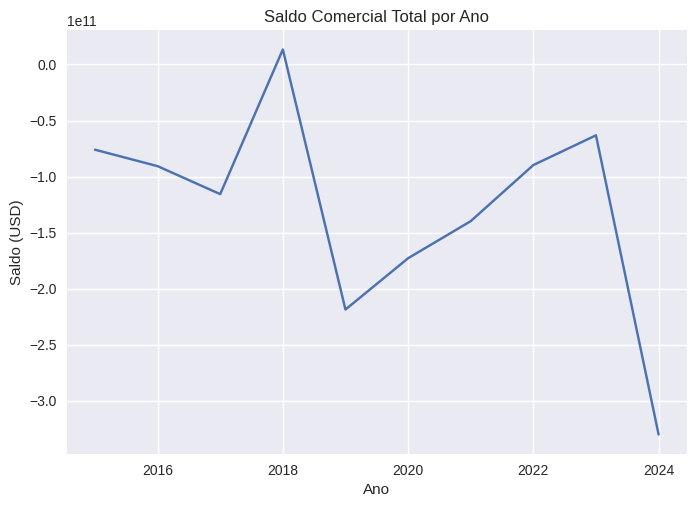

In [40]:
saldo_anual = dados.groupby("Ano")["Saldo_USD"].sum().reset_index()

plt.figure()
plt.plot(saldo_anual["Ano"], saldo_anual["Saldo_USD"])
plt.title("Saldo Comercial Total por Ano")
plt.xlabel("Ano")
plt.ylabel("Saldo (USD)")
plt.show()



*O gráfico apresenta a evolução do saldo comercial agregado entre o Brasil e os países analisados.
Observa-se que, ao longo do período, o saldo permaneceu predominantemente negativo, indicando que o Brasil importou mais do que exportou para esse conjunto de parceiros comerciais.
Embora haja períodos de melhora e recuperação parcial, especialmente entre 2020 e 2022, verifica-se uma intensificação do déficit no ano mais recente analisado.*

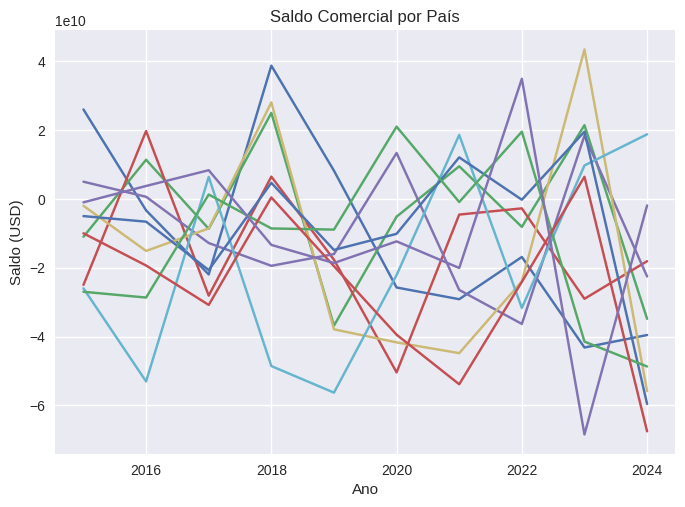

In [41]:
plt.figure()
for pais in dados["Pais"].unique():
    subset = dados[dados["Pais"] == pais]
    plt.plot(subset["Ano"], subset["Saldo_USD"])

plt.title("Saldo Comercial por País")
plt.xlabel("Ano")
plt.ylabel("Saldo (USD)")
plt.show()

*O gráfico apresenta a variação do saldo comercial do Brasil com cada parceiro ao longo do período analisado.
Observa-se elevada volatilidade entre os países, com alternância entre superávit e déficit em diferentes anos.
A análise individual permite identificar quais parceiros apresentam déficit estrutural e quais mantêm saldo positivo ao longo do tempo*.

<h2 style="color:red;">
O déficit comercial brasileiro está concentrado em poucos parceiros estratégicos ou distribuído de forma generalizada entre os países analisados?
</h2>

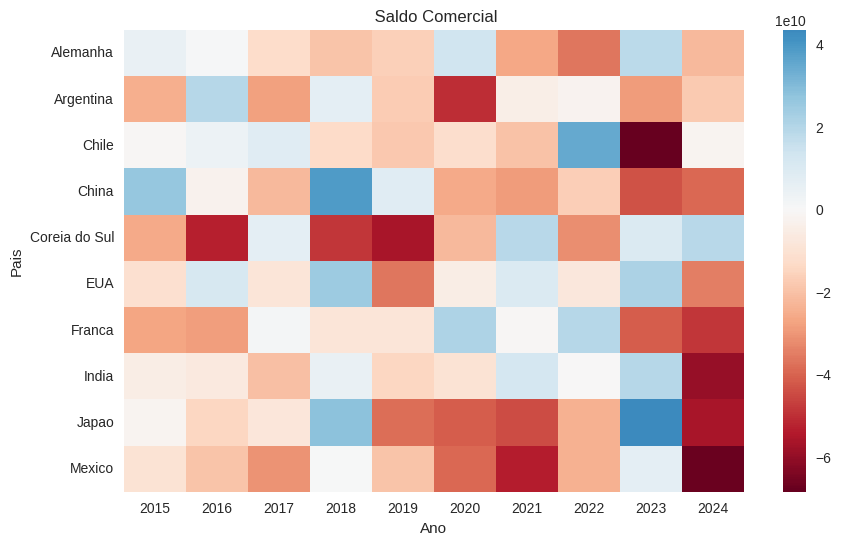

In [42]:
import seaborn as sns

pivot = dados.pivot(index="Pais", columns="Ano", values="Saldo_USD")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="RdBu", center=0)
plt.title(" Saldo Comercial")
plt.show()

*O mapa de calor evidencia que o déficit comercial brasileiro não está distribuído de maneira homogênea entre os parceiros analisados.
Observa-se que alguns países apresentam padrão estrutural de déficit ao longo do período, enquanto outros alternam entre superávit e déficit.
Nota-se também uma intensificação do saldo negativo no ano mais recente, indicando possível aumento do desequilíbrio comercial.*

##  Relação entre Câmbio e Importações

*Nesta etapa, incorporamos à base de dados a variável de câmbio médio anual, a fim de investigar se há relação entre a taxa de dólar e o volume de importações brasileiras.
A análise de correlação indica uma relação positiva fraca a moderada (≈ 0,30) entre o dólar médio e as importações. 
Isso sugere que, embora exista alguma associação entre a variação cambial e o comportamento das importações, o câmbio não é o único fator determinante do desequilíbrio comercial.*

In [43]:
dados = pd.merge(dados, cambio, on="Ano")
dados.head()

,Ano,Pais,Exportacoes_USD,Importacoes_USD,Saldo_USD,Dolar_Medio
0,2015,China,4.300000e+10,1.700000e+10,2.600000e+10,3.3
1,2015,EUA,3.300000e+10,4.400000e+10,-1.100000e+10,3.3
2,2015,Argentina,1.900000e+10,4.400000e+10,-2.500000e+10,3.3
3,2015,Alemanha,4.700000e+10,4.200000e+10,5.000000e+09,3.3
4,2015,Japao,1.200000e+10,1.400000e+10,-2.000000e+09,3.3


In [44]:
dados[["Importacoes_USD", "Dolar_Medio"]].corr()

,Importacoes_USD,Dolar_Medio
Importacoes_USD,1.000000,0.300048
Dolar_Medio,0.300048,1.000000


In [45]:
saldo_pais = dados.groupby("Pais")["Saldo_USD"].mean().sort_values()

saldo_pais

Pais
Mexico          -2.579100e+10
Coreia do Sul   -1.843375e+10
Japao           -1.585450e+10
Argentina       -1.494700e+10
Franca          -1.224700e+10
China           -1.069125e+10
Alemanha        -9.627250e+09
Chile           -8.879500e+09
India           -8.082000e+09
EUA             -3.738000e+09
Name: Saldo_USD, dtype: float64


*A média do saldo comercial por país permite identificar parceiros que apresentam déficit estrutural ao longo do período analisado.
Observa-se que alguns países concentram déficits médios significativos, indicando que o desequilíbrio comercial brasileiro não é homogêneo, mas sim concentrado em parceiros específicos.
Essa evidência reforça a hipótese de que o déficit comercial está associado a padrões estruturais de comércio e dependência setorial*.

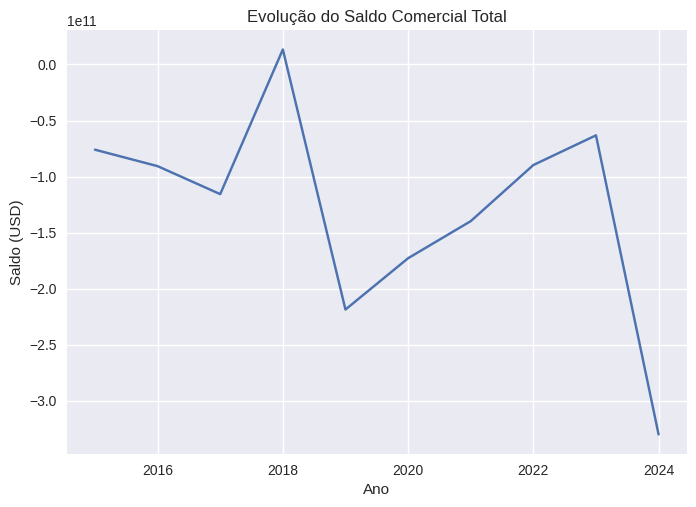

In [41]:
saldo_anual = dados.groupby("Ano")["Saldo_USD"].sum().reset_index()

plt.figure()
plt.plot(saldo_anual["Ano"], saldo_anual["Saldo_USD"])
plt.title("Evolução do Saldo Comercial Total")
plt.xlabel("Ano")
plt.ylabel("Saldo (USD)")
plt.show()

*A análise do saldo comercial total indica que o Brasil apresentou déficit na maior parte do período analisado, com oscilações relevantes ao longo dos anos.
Observa-se um pico de superávit em 2018, seguido por queda acentuada em 2019 e intensificação do déficit no ano mais recente.
Os resultados sugerem volatilidade estrutural na balança comercial com os parceiros analisados.*

In [43]:
pais_deficit = saldo_pais.idxmin()
pais_superavit = saldo_pais.idxmax()

pais_deficit, pais_superavit

('Mexico', 'EUA')

In [44]:
ranking_final = dados.groupby("Pais").agg({
    "Exportacoes_USD": "sum",
    "Importacoes_USD": "sum",
    "Saldo_USD": "sum"
}).sort_values("Saldo_USD")

ranking_final

,Exportacoes_USD,Importacoes_USD,Saldo_USD
Pais,,,
Mexico,2.899000e+11,5.478100e+11,-2.579100e+11
Coreia do Sul,3.039625e+11,4.883000e+11,-1.843375e+11
Japao,3.067750e+11,4.653200e+11,-1.585450e+11
Argentina,2.098500e+11,3.593200e+11,-1.494700e+11
Franca,2.990500e+11,4.215200e+11,-1.224700e+11
China,3.224875e+11,4.294000e+11,-1.069125e+11
Alemanha,3.590875e+11,4.553600e+11,-9.627250e+10
Chile,3.148250e+11,4.036200e+11,-8.879500e+10
India,4.099500e+11,4.907700e+11,-8.082000e+10



*O ranking acumulado evidencia que o déficit comercial brasileiro está concentrado em parceiros específicos.
Observa-se que México, Coreia do Sul e Japão apresentam os maiores déficits no período, enquanto outros parceiros apresentam desempenho menos negativo ou mais equilibrado.
A análise acumulada reforça a hipótese de concentração estrutural do desequilíbrio comercial.*

In [45]:
dados["Indice_Dependencia"] = dados["Importacoes_USD"] / (dados["Exportacoes_USD"] + 1)

indice_medio = dados.groupby("Pais")["Indice_Dependencia"].mean().sort_values(ascending=False)

indice_medio

Pais
Coreia do Sul    2.850458
Mexico           2.416932
Japao            2.395055
Argentina        2.281946
Chile            2.276703
Franca           1.936934
China            1.678747
India            1.444621
Alemanha         1.433707
EUA              1.260422
Name: Indice_Dependencia, dtype: float64

*Observa-se que alguns países apresentam índice consistentemente elevado, indicando que o desequilíbrio comercial não é circunstancial, mas estrutural ao longo do período analisado.*

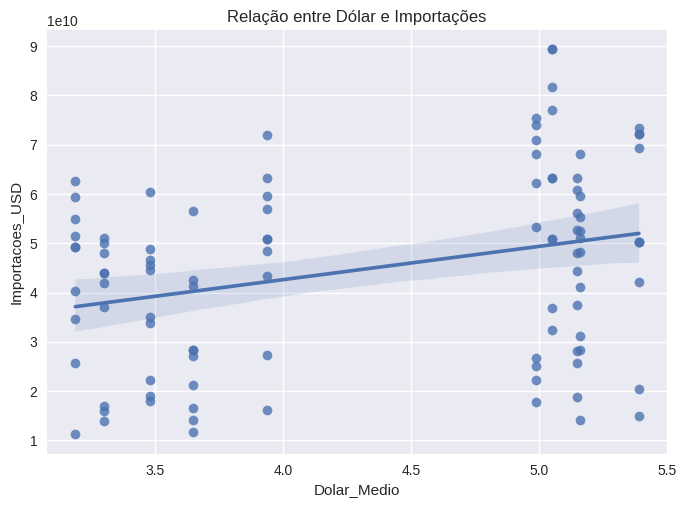

In [47]:
sns.regplot(x="Dolar_Medio", y="Importacoes_USD", data=dados)
plt.title("Relação entre Dólar e Importações")
plt.show()

<h2 style="color:red;">
Quando o dólar sobe , as importações aumentam ou diminuem ?
</h2>

*A análise gráfica e a correlação calculada (≈ 0,30) indicam uma relação positiva moderada entre o dólar médio anual e o volume de importações.
Embora o câmbio exerça influência sobre o comportamento das importações, a dispersão observada no gráfico demonstra que essa relação não é determinante. 
Os resultados sugerem que o desequilíbrio comercial brasileiro não decorre exclusivamente da variação cambial, mas também de fatores estruturais, como dependência de determinados parceiros comerciais e padrões produtivos..*

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

X = dados[["Dolar_Medio"]]
y = dados["Importacoes_USD"]

pipeline.fit(X, y)
pipeline.score(X, y)


0.09002895070286232

### Regressão Linear: Dólar vs Importações

*O modelo de regressão linear apresentou R² ≈ 0,09, indicando que o dólar médio explica apenas cerca de 9% da variação das importações.
Isso reforça a hipótese de que o desequilíbrio comercial brasileiro não é determinado exclusivamente pelo câmbio, mas por fatores estruturais mais complexos.*

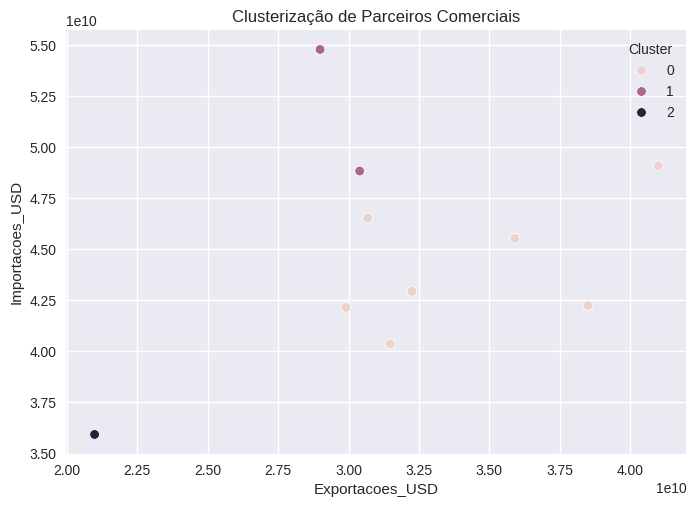

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = dados.groupby("Pais")[["Exportacoes_USD", "Importacoes_USD"]].mean()

scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

features["Cluster"] = clusters

sns.scatterplot(
    x=features["Exportacoes_USD"],
    y=features["Importacoes_USD"],
    hue=features["Cluster"]
)

plt.title("Clusterização de Parceiros Comerciais")
plt.show()

### Clusterização de Parceiros Comerciais
*A segmentação revelou três grupos distintos de parceiros comerciais:
Um grupo com alto volume de exportações e importações,
Um grupo intermediário ,Um grupo com menor intensidade comercial.
Isso sugere que o padrão de relacionamento comercial do Brasil não é homogêneo, havendo blocos de parceiros com dinâmicas semelhantes.*



## Conclusão Final

*O objetivo central deste projeto foi analisar se o desequilíbrio comercial brasileiro está concentrado em poucos parceiros estratégicos ou distribuído de forma generalizada, e em que medida o câmbio influencia esse comportamento.
Os resultados indicam que o déficit comercial brasileiro **não é homogêneo** entre os países analisados. A média do saldo por parceiro evidencia concentração do déficit em determinados países, sugerindo que o desequilíbrio não ocorre de maneira uniforme, mas sim associado a relações comerciais específicas.
O índice de dependência reforça essa interpretação ao mostrar que alguns parceiros apresentam proporção elevada de importações em relação às exportações ao longo do período, indicando um padrão estrutural e não circunstancial.
A análise da relação entre dólar e importações revelou correlação positiva moderada (≈ 0,30). Contudo, o modelo de regressão apresentou R² ≈ 0,09, demonstrando que o câmbio explica apenas cerca de 9% da variação das importações. Isso evidencia que, embora o dólar exerça influência, ele não é o principal determinante do desequilíbrio comercial.
Por fim, a clusterização dos parceiros comerciais mostrou a existência de grupos com padrões semelhantes de volume comercial, indicando que o Brasil mantém blocos distintos de relacionamento econômico, com diferentes níveis de intensidade e dependência.*

###  Resposta à pergunta central

*O desequilíbrio comercial brasileiro não está distribuído de forma generalizada entre todos os parceiros, nem pode ser explicado exclusivamente pela variação cambial. Ele apresenta caráter estrutural, concentrando-se em determinados parceiros estratégicos e refletindo padrões específicos de dependência comercial.*

